In [19]:
# Import necessary libraries
from ucimlrepo import fetch_ucirepo

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [22]:
# Load the dataset from UCI Machine Learning Repository
# fetch dataset 
online_retail = fetch_ucirepo(id=352) 

# data (as pandas dataframes) 
data = online_retail.data.features 
data_targets = online_retail.data.targets 
data.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Exploring the data

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB


In [20]:
# metadata 
print(online_retail.metadata)  

{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

In [24]:
# variable information 
print(online_retail.variables)

          name     role         type demographic  \
0    InvoiceNo       ID  Categorical        None   
1    StockCode       ID  Categorical        None   
2  Description  Feature  Categorical        None   
3     Quantity  Feature      Integer        None   
4  InvoiceDate  Feature         Date        None   
5    UnitPrice  Feature   Continuous        None   
6   CustomerID  Feature  Categorical        None   
7      Country  Feature  Categorical        None   

                                         description     units missing_values  
0  a 6-digit integral number uniquely assigned to...      None             no  
1  a 5-digit integral number uniquely assigned to...      None             no  
2                                       product name      None             no  
3  the quantities of each product (item) per tran...      None             no  
4  the day and time when each transaction was gen...      None             no  
5                             product price per uni

# **Fields and Data Types 🛒**

Online Retail dataset capturing transactional data of a UK-based online retailer from December 2010 to December 2011. It includes detailed invoice-level information about products purchased, quantities, unit prices, customer identifiers, and country of purchase. This dataset is commonly used for retail analytics, customer segmentation, and RFM analysis.

## **Data Dictionary**

| **Parameter** | **Description**                                                                                      |
| ------------- | ---------------------------------------------------------------------------------------------------- |
| `Description` | Text description of the product/item purchased (e.g., "WHITE HANGING HEART T-LIGHT HOLDER").         |
| `Quantity`    | Number of units of the product purchased per transaction (can be negative for returns).              |
| `InvoiceDate` | Timestamp of the transaction/invoice (format: `yyyy-mm-dd hh:mm:ss`).                                |
| `UnitPrice`   | Price per unit of the product at the time of the transaction, in GBP (British Pound).                |
| `CustomerID`  | Unique identifier assigned to each customer (nullable; some transactions are missing customer info). |
| `Country`     | Country name where the customer resides or where the purchase was made.                              |



# Understanding Data

In [25]:
# Display the dimensions of the dataset
data.shape

(541909, 6)

In [28]:
# Display the descriptive statistics of the dataset
# data.describe()
data.describe(include='all')

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,4223,NaN,23260,NaN,NaN,38
top,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,2369,NaN,1114,NaN,NaN,495478
mean,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [29]:
# Display column names of the dataset
data.columns.values

array(['Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country'], dtype=object)

In [34]:
# Count the ocurrences of each Country in the dataset
data.Country.value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


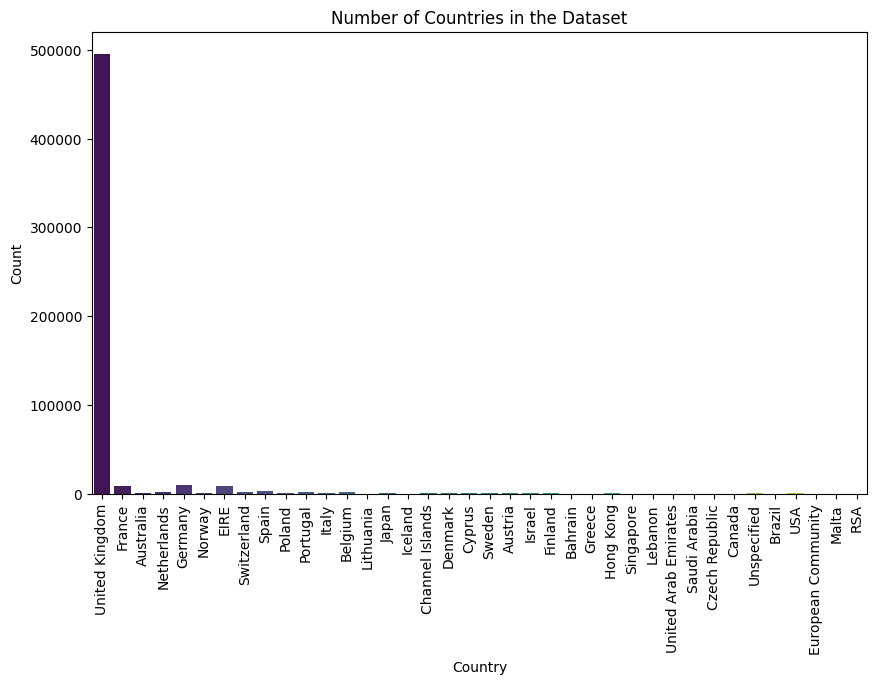

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='Country',data=data, palette='viridis')
plt.xticks(rotation=90)
plt.title("Number of Countries in the Dataset")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

# Now i going to checking the number of unique values in each column

In [36]:
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


# Missing values

In [37]:
# Check for missing values
print(data.isnull().sum())

Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
